In [1]:
#IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델 훈련하기

컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다.
따라서 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.

분리된 단어를 **토큰**이라고 부른다.

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다

0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰

In [9]:
#IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함
from tensorflow.keras.datasets import imdb #imdb 모듈 임포트
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200) #가장 자주 등장하는 단어 200개만 사용

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


IMDB 리뷰 텍스트는 길이가 제각각이다. 


따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다.

In [14]:
print(len(train_input[0]))

218


In [16]:
#첫번째 리뷰의 길이는 218개의 토큰으로 이루어져 있다.

In [18]:
print(len(train_input[1]))

189


In [20]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


리뷰 데이터는 이미 정수로 변환되어 있으며, 어휘 사전에는 200개의 단어만 들어가 있기 때문에 어휘 사전에 없는 단어는 2로 표시되어 나타난다.

In [23]:
#타깃 데이터 출력
print(train_input[:20])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 2, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 2, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 1

In [25]:
#훈련 세트에서 20%를 검증 세트로 떼어놓기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [27]:
#각 리뷰의 길이를 계산해 넘파이 배열에 담기
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [29]:
#리뷰 길이의 평균값과 중앙값 구하기
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


In [31]:
#평균값과 중앙값을 보아 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것으로 예상할 수 있다.

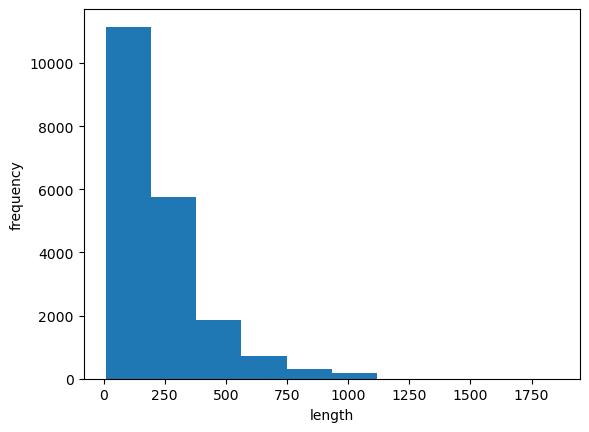

In [33]:
#lengths 배열을 히스토그램으로 표현
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [35]:
#리뷰가 대부분 짧아서 100개의 단어만 사용할 것이다.
#100개의 단어보다 작은 리뷰들은 길이를 100으로 맞추기 위해 패딩을 사용한다. (패딩을 나타내는 토큰은 0이다.)

In [37]:
#시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수 사용
#maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩한다.

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [39]:
print(train_seq.shape)

(20000, 100)


In [41]:
#길이를 맞췄기 때문에 2차원 배열이 되었다.

In [43]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [45]:
#패딩값 0이 앞뒤에 없는 것으로 보아 100보다는 길었을 것으로 예상

In [47]:
print(train_input[0][-10:]) #첫번째 샘플의 마지막 10개 토큰 출력

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [49]:
#train_seq[0]의 출력값과 일치하는 것으로 보아 앞부분이 잘렸다는 것을 짐작할 수 있다.

보통 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문에 앞부분을 자른다.


영화 리뷰 데이터를 생각해 보면 리뷰 끝에 결정적인 소감을 말할 가능성이 높다고 본다.

In [52]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [54]:
#앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안될 것이다.

같은 이유로 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치기 때문에 앞부분에 패딩을 추가한다.

In [57]:
#검증 세트의 길이도 100으로 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

In [61]:
#순환 신경망 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,200)))
model.add(keras.layers.Dense(1, activation='sigmoid')) #이진분류이므로 출력층은 1개의 뉴런을 가진다.

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**200은 어디서 온 숫자인가?**


토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들게 된다.


따라서 정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하고자 원-핫 인코딩 방식을 사용한다.


위에서 200개의 단어만 사용하도록 지정했기 때문에 배열의 길이는 200이 되는 것이다.

In [64]:
#자동으로 원-핫 인코딩된 배열을 반환
train_oh = keras.utils.to_categorical(train_seq)

In [66]:
#원-핫 인코딩된 배열의 크기 출력
print(train_oh.shape)

(20000, 100, 200)


In [68]:
#첫번째 샘플의 첫번째 토큰이었던 10이 잘 인코딩되었는지 출력
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [70]:
#열한번째 원소를 제외한 나머지 원소가 모두 0인지 확인
print(np.sum(train_oh[0][0]))

1.0


In [72]:
#val_seq도 원-핫 인코딩으로 변경
val_oh = keras.utils.to_categorical(val_seq)

In [74]:
#훈련 세트 및 검증 세트 준비 완료
#모델의 구조 출력

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

입력 토큰인 200차원의 원-핫 인코딩 배열 x 순환층의 뉴런 8개 = 1600



은닉 상태 크기 8 x 순환층의 뉴런 8개 = 64



뉴런마다의 절편 8


1600 + 64 + 8  = 1,672 

In [77]:
#순환 신경망 훈련하기 

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #학습률 0.0001로 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4932 - loss: 0.7085 - val_accuracy: 0.4850 - val_loss: 0.7099
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5081 - loss: 0.7011 - val_accuracy: 0.4856 - val_loss: 0.7048
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5168 - loss: 0.6961 - val_accuracy: 0.4948 - val_loss: 0.7010
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5121 - loss: 0.6943 - val_accuracy: 0.4974 - val_loss: 0.6985
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5339 - loss: 0.6905 - val_accuracy: 0.5148 - val_loss: 0.6950
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5511 - loss: 0.6858 - val_accuracy: 0.5504 - val_loss: 0.6844
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5791 - loss: 0.6768 - val_accuracy: 0.5902 - val_loss: 0.6731
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6126 - loss: 0.6631 - val_acc

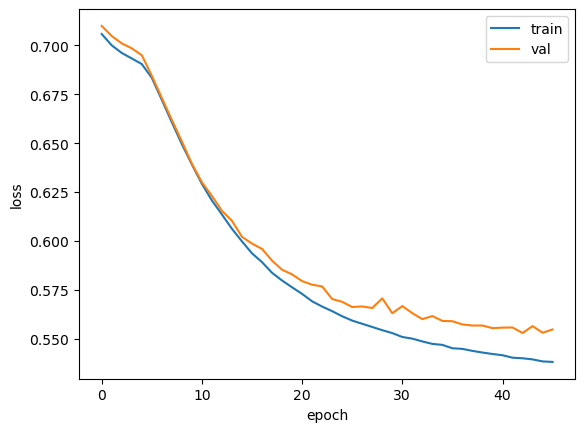

In [79]:
#훈련 손실과 검증 손실을 그래프로 그려보기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [81]:
#훈련손실은 꾸준히 감소하고 있지만 검증손실은 대략 스무번째 에포크부터 감소가 둔해지고 있다.

In [83]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 3200000000


In [85]:
#원-핫 인코딩의 단점 .. 입력 데이터가 엄청 커진다.

In [87]:
#원-핫 인코딩 대신 단어 임베딩 사용하기 .. 단어를 고정된 크기의 실수 벡터로 바꾸어준다.
#훨씬 작은 크기로도 단어를 잘 표현할 수 있다.
#단어 임베딩의 장점은 입력으로 정수 데이터를 받기 때문에 원-핫 인코딩으로 변경된 것이 아닌 train_seq를 사용할 수 있다.

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(200, 16, input_shape=(100,))) #16은 임베딩 벡터의 크기 (200은 어휘 사전의 크기, 100은 샘플의 길이)
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
#모델 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5042 - loss: 0.6989 - val_accuracy: 0.5242 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5450 - loss: 0.6880 - val_accuracy: 0.6206 - val_loss: 0.6689
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6309 - loss: 0.6644 - val_accuracy: 0.6740 - val_loss: 0.6460
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6675 - loss: 0.6448 - val_accuracy: 0.6316 - val_loss: 0.6471
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6883 - loss: 0.6232 - val_accuracy: 0.6642 - val_loss: 0.6239
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7001 - loss: 0.6062 - val_accuracy: 0.6606 - val_loss: 0.6198
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7118 - loss: 0.5937 - val_accuracy: 0.7096 - val_loss: 0.5849
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7182 - loss: 0.5791 - val_accu

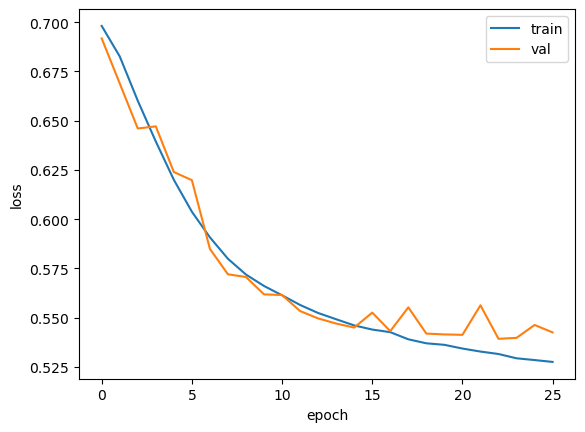

In [91]:
#출력 결과 -> 원-핫 인코딩을 사용한 모델과 성능은 비슷하고, 가중치 개수는 훨씬 작아지고 훈련 세트의 길이도 훨씬 줄어들었다.

#훈련 손실과 검증 손실을 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()